<a href="https://colab.research.google.com/github/alfredwilson/TFM/blob/master/TFM_Classificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ENTRENAMIENTO DE UN CLASIFICADOR DE CÉLULAS NORMALES DE LA SANGRE
Se muestran en este notebook 6 modelos entrenados, y finalmente se selecciona el modelo propio por tener las mejores métricas de accuracy y val_accuracy.

In [0]:
#Activar Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Instalar la versión más reciente de tensorflow:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
tf.__version__

'2.1.0-rc1'

In [0]:
#Rutas de las imágenes desde Google Drive
train_path='/content/drive/My Drive/Colab Notebooks/images/train'
test_path='/content/drive/My Drive/Colab Notebooks/images/test'

In [0]:
print(train_path)

/content/drive/My Drive/Colab Notebooks/images/train


Importar las librerias necesarias

In [0]:
#import keras
# from keras.models import Model
#from keras.preprocessing import image
#from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#Training:
eosinophil_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/train/EOSINOPHIL')
lymphocyte_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/train/LYMPHOCYTE')
monocyte_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/train/MONOCYTE')
neutrophil_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/train/NEUTROPHIL')

#Validation:
eosinophil_Vdir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/test/EOSINOPHIL')
lymphocyte_Vdir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/test/LYMPHOCYTE')
monocyte_Vdir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/test/MONOCYTE')
neutrophil_Vdir = os.path.join('/content/drive/My Drive/Colab Notebooks/images/test/NEUTROPHIL')

print('total imagenes training eosinophil:', len(os.listdir(eosinophil_dir)))
print('total imagenes training lymphocyte:', len(os.listdir(lymphocyte_dir)))
print('total imagenes training monocyte:', len(os.listdir(monocyte_dir)))
print('total imagenes training neutrophil:', len(os.listdir(neutrophil_dir)))

print('total imagenes test eosinophil:', len(os.listdir(eosinophil_Vdir)))
print('total imagenes test lymphocyte:', len(os.listdir(lymphocyte_Vdir)))
print('total imagenes test monocyte:', len(os.listdir(monocyte_Vdir)))
print('total imagenes test neutrophil:', len(os.listdir(neutrophil_Vdir)))

total imagenes training eosinophil: 2603
total imagenes training lymphocyte: 2589
total imagenes training monocyte: 2584
total imagenes training neutrophil: 2605
total imagenes test eosinophil: 629
total imagenes test lymphocyte: 626
total imagenes test monocyte: 626
total imagenes test neutrophil: 630


In [0]:
### NO CORRER
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/images/TRAIN',class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/images/TEST',class_mode='categorical')


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


ENTENDIENDO LOS DATOS

In [0]:
eos_files = os.listdir(eosinophil_dir)
print('eos:',eos_files[:6])
lympho_files = os.listdir(lymphocyte_dir)
print('limpho: ',lympho_files[2373:2385])
mono_files = os.listdir(monocyte_dir)
print('mono: ',mono_files[2372:2383])
neutro_files = os.listdir(neutrophil_dir)
print('neutrop:', neutro_files[2390:2399])

eos: ['_53_1628.jpeg', '_53_1261.jpeg', '_53_1962.jpeg', '_53_1849.jpeg', '_53_2330.jpeg', '_53_2625.jpeg']
limpho:  ['_13_1349.jpeg', '_13_1364.jpeg', '_13_1754.jpeg', '_13_2290.jpeg', '_13_1937.jpeg', '_13_1505.jpeg', '_13_2183.jpeg', '_13_1684.jpeg', '_13_1902.jpeg', '_13_1350.jpeg', '_13_2637.jpeg', '_13_2696.jpeg']
mono:  ['_11_4593.jpeg', '_11_4104.jpeg', '_11_4585.jpeg', '_11_4244.jpeg', '_11_4257.jpeg', '_11_4695.jpeg', '_11_4582.jpeg', '_11_470.jpeg', '_11_4875.jpeg', '_11_4995.jpeg', '_11_5482.jpeg']
neutrop: ['_121_5471.jpeg', '_121_7410.jpeg', '_122_2060.jpeg', '_122_2604.jpeg', '_122_1031.jpeg', '_122_5221.jpeg', '_122_4504.jpeg', '_122_5161.jpeg', '_122_5784.jpeg']


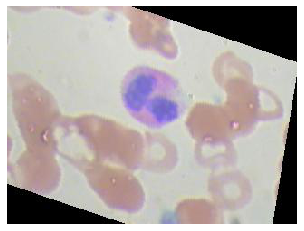

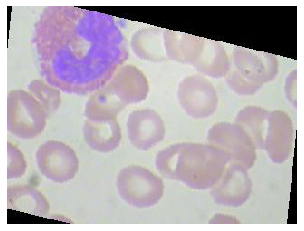

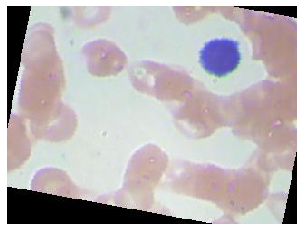

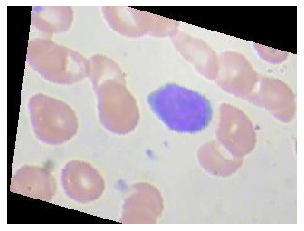

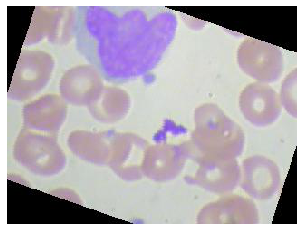

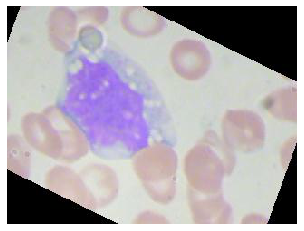

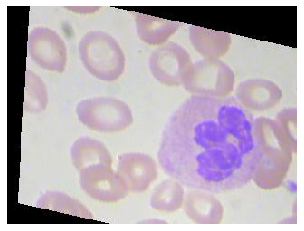

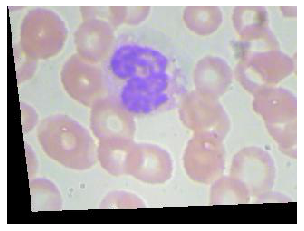

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pic_index = 2
next_eos = [os.path.join(eosinophil_dir, fname) 
                for fname in eos_files[pic_index-2:pic_index]]
next_lympho = [os.path.join(lymphocyte_dir, fname) 
                for fname in lympho_files[pic_index-2:pic_index]]
next_mono = [os.path.join(monocyte_dir, fname) 
                for fname in mono_files[pic_index-2:pic_index]]
next_neutro = [os.path.join(neutrophil_dir, fname) 
                for fname in neutro_files[pic_index-2:pic_index]]
for i, img_path in enumerate(next_eos+next_lympho+next_mono+next_neutro):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

##Entrenamiento de los modelos
Se entrenan diferentes modelos en distintas arquitecturas con Sequential.
Los modelos 2 y 3 tienen un accuracy y val_accuracy que No supera el azar de 0.25 de seleccionar 1 figura de 4. 

In [0]:
from tensorflow.keras.layers import MaxPool2D

In [0]:
#Modelo 3 En este se realiza previamente un procesamiento de imágenes
from tensorflow.keras.preprocessing import image

generator = image.ImageDataGenerator(
        rescale = 1./255,
        featurewise_center=False,  # establecer la media a 0 sobre el dataset
        samplewise_center=False,  # establecer cada media muestral a 0
        featurewise_std_normalization=False,  # dividir las entradas por la desviacion estandar del dataset
        samplewise_std_normalization=False,  # dividir cada entrada por su desviación estandar
        zca_whitening=False,  # apilicar el ZCA whitening
        rotation_range=10,  # rotar las imágenes aleatoriamente en el rango (grados deg, 0 to 180)
        width_shift_range=0.1,  # aleatoriamente cambiar las imagenes horizontalmente (fraccion del ancho total)
        height_shift_range=0.1,  # aleatoriamente cambiar las imágnes verticalente (fraccion de la altura total)
        horizontal_flip=True,  # aleatoriamente voltear las imágenes
        vertical_flip=False)

In [0]:
dataset = generator.flow_from_directory(
    shuffle = True,
    batch_size = 32, #No es necesario
    target_size = (240, 320),
    directory = '/content/drive/My Drive/Colab Notebooks/images/TRAIN'
)

Found 9957 images belonging to 4 classes.


In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu'))
    model.add(Conv2D(64, (3,3), strides = (1, 1), activation = 'relu', input_shape = (240, 320, 3)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model

In [0]:
nn = model()
nn.fit_generator(dataset, steps_per_epoch = None, epochs = 5, verbose = 1)
nn.summary()
nn.save('Model.h5')

Epoch 1/5
312/312 [==============================] - 3477s 11s/step - loss: 1.3925 - accuracy: 0.2549
Epoch 2/5
312/312 [==============================] - 179s 573ms/step - loss: 1.3877 - accuracy: 0.2505
Epoch 3/5
312/312 [==============================] - 179s 575ms/step - loss: 1.3869 - accuracy: 0.2524
Epoch 4/5
312/312 [==============================] - 181s 580ms/step - loss: 1.3867 - accuracy: 0.2501
Epoch 5/5
312/312 [==============================] - 181s 579ms/step - loss: 1.3865 - accuracy: 0.2466
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  2240      
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  46144     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
____

In [0]:
# Modelo 2. Se configuran algunas variables en primer lugar:
batch_size = 128
epochs = 5
IMG_HEIGHT = 240
IMG_WIDTH = 320

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generador para los datos de training
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generador para los datos de Test

In [0]:
TRAINING_DIR = "/content/drive/My Drive/Colab Notebooks/images/TRAIN"
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=TRAINING_DIR,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 9957 images belonging to 4 classes.


In [0]:
VALIDATION_DIR = "/content/drive/My Drive/Colab Notebooks/images/TEST"
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=VALIDATION_DIR,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2487 images belonging to 4 classes.


CREAR EL MODELO No. 2

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='sigmoid') # 4 por las 4 clases de celulas
])

[texto del enlace](`https:// [texto del enlace](https://`))COMPILAR EL MODELO No. 2

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

MODEL SUMMARY

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 320, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 160, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 160, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 80, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 40, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 76800)             0

Entrenar el modelo No. 2 

In [0]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_data_gen, epochs=5, validation_data = val_data_gen, verbose = 1)

Epoch 1/5
78/78 [==============================] - 4029s 52s/step - loss: 1.4763 - accuracy: 0.2502 - val_loss: 1.3863 - val_accuracy: 0.2505
Epoch 2/5
78/78 [==============================] - 61s 782ms/step - loss: 1.3863 - accuracy: 0.2508 - val_loss: 1.3863 - val_accuracy: 0.2505
Epoch 3/5
78/78 [==============================] - 61s 784ms/step - loss: 1.3863 - accuracy: 0.2508 - val_loss: 1.3863 - val_accuracy: 0.2505
Epoch 4/5
78/78 [==============================] - 61s 781ms/step - loss: 1.3863 - accuracy: 0.2508 - val_loss: 1.3863 - val_accuracy: 0.2505
Epoch 5/5
78/78 [==============================] - 61s 787ms/step - loss: 1.3863 - accuracy: 0.2508 - val_loss: 1.3863 - val_accuracy: 0.2505


##ENTRENAMIENTO DEL MODELO PROPIO  No 1 
Entrenado desde cero es el modelo base y que mostró el mejor desempeño en los accuracy inclusive por encima de modelos entrenados con redes pre entrenadas como se muestra en el resto de este notebook.

In [0]:
#LIbrerías necesarias para el modelo No. 1
import os
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [0]:
# Modelo No. 1
TRAINING_DIR = "/content/drive/My Drive/Colab Notebooks/images/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/Colab Notebooks/images/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(120,160),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(120,160),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
      # Este es la primera convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(120,160, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # La segunda convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La tercera convolucion
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La cuarta convolucion
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten los resultados para alimentar una DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator,
                              verbose = 1)
saved_model_path = "/content/drive/My Drive/Colab Notebooks"
tf.saved_model.save(model, saved_model_path)

Found 10381 images belonging to 4 classes.
Found 2511 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 158, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 79, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 77, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 18, 128)       0         
_____________________________________

# MODELO No. 4 (modelo1C) con la red preentrenada InceptionV3
Aparentemente da un buen accuracy y val_accuracy, pero al probar con imagenes de la carpete test, no las clasifica correctamente.

In [0]:
# Modelo No. 4 (model1C) con InceptionV3

model1c = tf.keras.models.Sequential([
    tf.keras.applications.InceptionV3(input_shape=(120,160, 3),
                                               include_top=False,
                                               weights='imagenet'),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(120,160, 3)),
    tf.keras.layers.Conv2D(64, (2,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(1,2),
    # La segunda convolucion
    tf.keras.layers.Conv2D(64, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(1,1),
    # La tercera convolucion
    tf.keras.layers.Conv2D(128, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(1,1),
    # La cuarta convolucion
    tf.keras.layers.Conv2D(128, (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(1,1),
    # Flatten los resultados para alimentar una DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


model1c.summary()

model1c.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1c.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)
#model.save("/content/drive/My Drive/Colab Notebooks/rps.h5")
saved_model_path = "/content/drive/My Drive/Colab Notebooks/modelos"
tf.saved_model.save(model1c, saved_model_path)

Found 10381 images belonging to 4 classes.
Found 2511 images belonging to 4 classes.
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 3, 2048)        21802784  
_________________________________________________________________
conv2d_1541 (Conv2D)         (None, 1, 1, 64)          786496    
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1542 (Conv2D)         (None, 1, 1, 64)          4160      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_1543 (Conv2D)         (None, 1, 1, 128)         8320      
__________________________________

#Prueba del modelo No. 4 entrenado con Inception
Se observa que No clasifica las imágenes: Todas las clasifica erroneamente como eosinófilos que es [1 0 0 0]

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(120, 160))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1c.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving _0_331.jpeg to _0_331.jpeg
Saving _0_750.jpeg to _0_750.jpeg
Saving _0_842.jpeg to _0_842.jpeg
Saving _0_1529.jpeg to _0_1529.jpeg
Saving _0_1587.jpeg to _0_1587.jpeg
Saving _0_1726.jpeg to _0_1726.jpeg
_0_331.jpeg
[[1. 0. 0. 0.]]
_0_750.jpeg
[[1. 0. 0. 0.]]
_0_842.jpeg
[[1. 0. 0. 0.]]
_0_1529.jpeg
[[1. 0. 0. 0.]]
_0_1587.jpeg
[[1. 0. 0. 0.]]
_0_1726.jpeg
[[1. 0. 0. 0.]]


# Modelo No. 5: Entrenado con MobileNetV2
Este modelo si bien la métric accuracy llega al 0.7, la métrica val_accuracy no supera el valor de 0.3, por lo cual se descarta como modelo base.

In [0]:
# Modelo No. 5: Entrenado con MobileNetV2

#Cargar el modelo preentrenado
base_model=tf.keras.applications.MobileNetV2(input_shape=(120,160, 3),
                                                include_top=False,
                                                weights='imagenet')
base_model.trainable = False #Congelar las capas del modelo

model1e = tf.keras.models.Sequential([
  base_model, 
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
  ])

model1e.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model1e.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)
saved_model_path = "/content/drive/My Drive/Colab Notebooks/modelo1e"
tf.saved_model.save(model1e, saved_model_path)

Found 10381 images belonging to 4 classes.
Found 2511 images belonging to 4 classes.


/tensorflow-2.1.0/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 2052      
Total params: 2,915,908
Trainable params: 657,924
Non-tra

# Prueba modelo No. 5 (model1e) Entrenado con MobileNetV2
Al hacer las pruebas, se observa que da probabilidades de las categorías de células de sangre, pero dado el bajo nivel logrado en val_accuracy, hay un error muy alto en estos resultados.

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(120, 160))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1e.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving _0_292.jpeg to _0_292.jpeg
Saving _0_4628.jpeg to _0_4628 (1).jpeg
Saving _0_4888.jpeg to _0_4888 (1).jpeg
Saving _0_9742.jpeg to _0_9742.jpeg
Saving _1_160.jpeg to _1_160 (1).jpeg
Saving _1_4083.jpeg to _1_4083.jpeg
_0_292.jpeg
[[0.02618413 0.9702481  0.00173638 0.00183136]]
_0_4628.jpeg
[[0.60126185 0.3126468  0.04856003 0.03753127]]
_0_4888.jpeg
[[0.41261193 0.5365051  0.02213405 0.0287489 ]]
_0_9742.jpeg
[[0.7102324  0.17173369 0.01734086 0.10069299]]
_1_160.jpeg
[[0.1371438  0.6551963  0.01803907 0.18962087]]
_1_4083.jpeg
[[0.31830704 0.62872624 0.00371413 0.0492526 ]]


# Modelo 6 (model1f) entrenado con InceptionResNetV2
Los resultados son muy bajos en la exactitud como se muestra más adelante.

In [0]:
# Modelo No. 6 (model1f)

#Cargar el modelo preentrando
base_model=tf.keras.applications.InceptionResNetV2(input_shape=(120,160, 3),
                                                include_top=False,
                                                weights='imagenet')
base_model.trainable = False #Congelar las capas del modelo

model1f = tf.keras.models.Sequential([
  base_model, #,#sale [4,5]
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
  ])
model1f.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model1f.fit_generator(train_generator, epochs=50, validation_data = validation_generator, verbose = 1)
saved_model_path = "/content/drive/My Drive/Colab Notebooks/modelo1f"
tf.saved_model.save(model1f, saved_model_path)


#Entrenamiento del modelo No. 6 (model1f)
Se muestra el resultados de las últimas 2 iteraciones, se descarta por el bajo desempeño dado por val_acuracy.

Epoch 49/50
325/325 [==============================] - 78s 240ms/step - loss: 0.5672 - accuracy: 0.7927 - val_loss: 5.9069 - val_accuracy: 0.2465

Epoch 50/50
325/325 [==============================] - 78s 241ms/step - loss: 0.5799 - accuracy: 0.7926 - val_loss: 4.5181 - val_accuracy: 0.2843

#MODELO NO. 1 (MODELO BASE) ESTA VEZ CON ECHO=50
Al no observar mejoría en las métricas de exactitud con varios modelos entrenados, se procede a reentrenar el modelo 1 (modelo base) con más iteraciones.

In [0]:
import os
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# Modelo No. 1h
#import tensorflow as tf
TRAINING_DIR = "/content/drive/My Drive/Colab Notebooks/images/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/Colab Notebooks/images/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(120,160),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(120,160),
	class_mode='categorical'
)

model1g = tf.keras.models.Sequential([
    # Obserque que el input shape corersponde al tamaño deseado de la imagen 240x320 Alto*ancho con 3 bytes por el color
    # Este es la primera convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(120,160, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # La segunda convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La tercera convolucion
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La cuarta convolucion
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten los resultados para alimentar una DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model1g.summary()

model1g.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#Para tensorflow 3.1 usar model.fit()
history = model1g.fit(train_generator, epochs=50, validation_data = validation_generator, verbose = 1)
#model.save("/content/drive/My Drive/Colab Notebooks/rps.h5")
saved_model_path = "/content/drive/My Drive/Colab Notebooks/modelo1g"
tf.saved_model.save(model1g, saved_model_path)

Found 10381 images belonging to 4 classes.
Found 2511 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 118, 158, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 79, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 77, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 38, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 18, 128)       0         
___________________________________

Graficar el proceso de entrenamiento

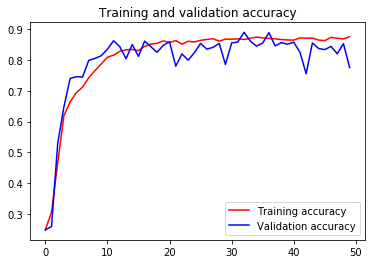

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Explorando la arquitectura de la red VGG16
Se explora esta red y se procede a entrenar una red como último modelo

In [0]:
conv_base=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
conv_base.trainable = False
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

# Modelo 6 (model1k) entrenado con VGG16
Después de analizar la arquitectura de la red VGG16, se procede a entrenar y se obtienen buenos resultados en la métrica accuracy pero un nivel bajo en val_accuracy. Es el segundo mejor modelo.

In [0]:
# Modelo No. 1k

conv_base=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
conv_base.trainable = False

model1k = tf.keras.models.Sequential([
  conv_base,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
  
])
  
model1k.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#Para tensorflow 3.1 usar model.fit()
history = model1k.fit(train_generator, epochs=14, validation_data = validation_generator, verbose = 1)

saved_model_path = "/content/drive/My Drive/Colab Notebooks/modelo1m"
tf.saved_model.save(model1k, saved_model_path)

Found 10381 images belonging to 4 classes.
Found 2511 images belonging to 4 classes.
58892288/58889256 [==============================] - 1s 0us/step
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 325 steps, validate for 79 steps
Epoch 1/14
325/325 [==============================] - 4053s 12s/step - loss: 1.3544 - accuracy: 0.4299 - val_loss: 1.0839 - val_accuracy: 0.5516
Epoch 2/14
325/325 [==============================] - 2825s 9s/step - loss: 1.0400 - accuracy: 0.5566 - val_loss: 1.0211 - val_accuracy: 0.5727
Epoch 3/14
325/325 [==============================] - 2857s 9s/step - loss: 0.9516 - accuracy: 0.6102 - val_loss: 1.0392 - val_accuracy: 0.5591
Epoch 4/14
325/325 [==============================] - 2852s 9s/step - loss: 0.8978 - accuracy: 0.6264 - val_loss: 0.9370 - val_accuracy: 0.5826
Epoch 5/14
325/325 [==============================] - 2852s 9s/step - loss: 0.8514 - accuracy: 0.6473 - val_loss: 0.9133 - val_accuracy: 0.6145
Epoch 6/14
325/325 [================

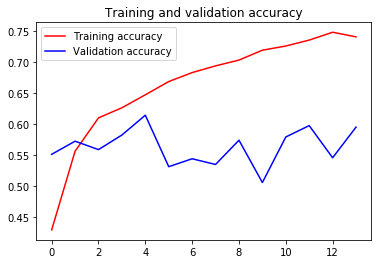

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()